<a href="https://colab.research.google.com/github/Antony-6487/basic-calc/blob/main/dsail_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Consider the system of linear equations below
 x1 +2x2 +x3 = 8
 x2 +x3 = 5
 x1 +2x3 = 7
 Express these equations in matrix form and determine x1 x2 and x3 using python.

In [ ]:
import numpy as np
from scipy import linalg
# x1 + 2x2 +x3= 8
# x2 +x3= 5
# x1 + 2x3 = 7
a=np.array([[1, 2, 1],[0, 1, 1],[1, 0, 2]])
print(a)
b=np.array([[8],[5],[7]])
print(b)
answer=linalg.solve(a,b)
print(answer)
# or with x values clearly indicated
print("x1=", round(answer[0, 0], 3),"x2=", round(answer[0, 0], 3),"x3=", round(answer[0, 0], 3))

[[1 2 1]
 [0 1 1]
 [1 0 2]]
[[8]
 [5]
 [7]]
[[1.]
 [2.]
 [3.]]
x1= 1.0 x2= 1.0 x3= 1.0


 1. Consider the function
 f(x) = sin(x) +sin( 10
 3 x)
 To determine a local stationary point via gradient descent we perform the following gradient
 descent steps starting at a point x0 for a number of iterations.
 xn+1 = xn
df(x)
 dx x=xn
 Write python code to implement gradient descent for f(x) and determine the local minimum
 of the function for x [2775] by performing multiple restarts. Use = 01.

Best local minimum found at x = 5.14574 with f(x) = -1.89960


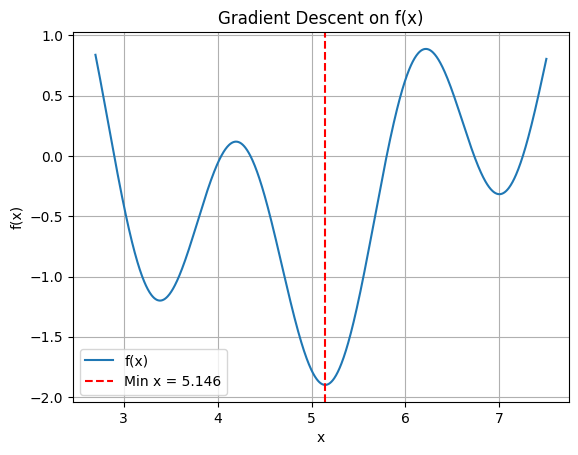

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Defining the function and its derivative
def f(x):
    return np.sin(x) + np.sin((10/3) * x)

def df(x):#derivative equivalent of f(x)
    return np.cos(x) + (10/3) * np.cos((10/3) * x)
# Gradient descent function
def gradient_descent(x0, lr=0.1, max_iter=1000, tol=1e-6):
    x = x0
    for i in range(max_iter):#chose maximum iterations to be a 1000 for high accuracy
        grad = df(x)
        x_new = x - lr * grad
        if abs(x_new - x) < tol:
            break
        x = x_new
    return x, f(x)

# Perform multiple restarts
np.random.seed(47)
num_restarts = 50
x_range = (2.7, 7.5)

best_x = None
best_fx = float('inf')

for _ in range(num_restarts):
    x0 = np.random.uniform(*x_range)
    x_min, fx_min = gradient_descent(x0)
    if fx_min < best_fx:
        best_x = x_min
        best_fx = fx_min

print(f"Best local minimum found at x = {best_x:.5f} with f(x) = {best_fx:.5f}")

# Optional: Plot the function and minima
x_vals = np.linspace(*x_range, 1000)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='f(x)')
plt.axvline(best_x, color='red', linestyle='--', label=f'Min x = {best_x:.3f}')
plt.title('Gradient Descent on f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


Consider the text below drawn from a famous poem
 Turning and turning in the widening gyre
 The falcon cannot hear the falconer;
 Things fall apart; the centre cannot hold;
 Mere anarchy is loosed upon the world,
 The blood-dimmed tide is loosed, and everywhere
 The ceremony of innocence is drowned;
 The best lack all conviction, while the worst
 Are full of passionate intensity.
 Write python code to determine the empirical distribution of each of the characters appear
ing in the poem (ignore punctuation marks and the space). Also treat lower and upper case
 characters as the same character. For example in seven , p(e) = 2
 5. Plot a histogram of
 this empirical distribution.

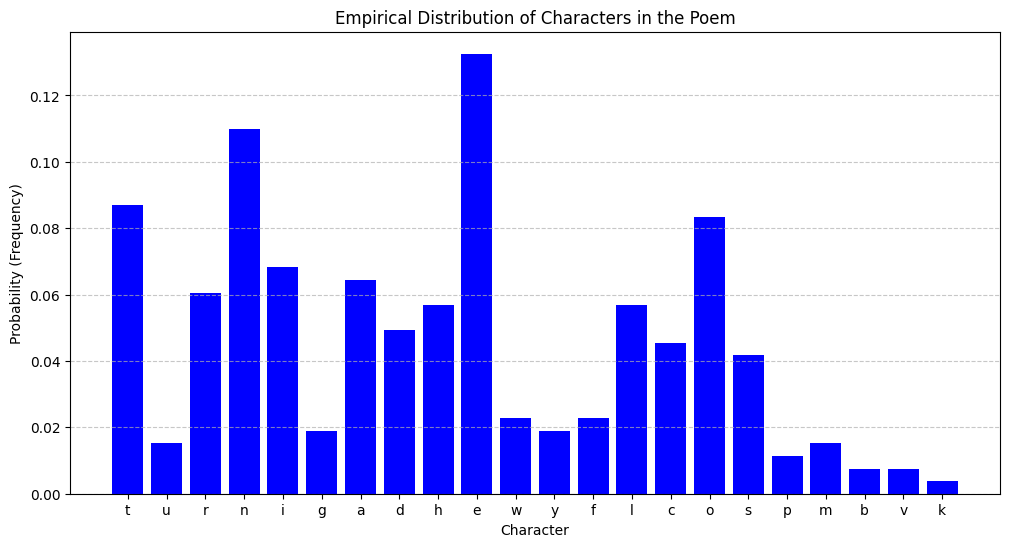

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import string

# Original text
poem = """
Turning and turning in the widening gyre
The falcon cannot hear the falconer;
Things fall apart; the centre cannot hold;
Mere anarchy is loosed upon the world,
The blood-dimmed tide is loosed, and everywhere
The ceremony of innocence is drowned;
The best lack all conviction, while the worst
Are full of passionate intensity.
"""
clean_text = poem.lower()
clean_text = ''.join(char for char in clean_text if char.isalpha())  # keep only letters

#counting characters
char_counts = Counter(clean_text)
total_chars = sum(char_counts.values())

#Computing empirical distribution
empirical_dist = {char: count / total_chars for char, count in char_counts.items()}

#Plot histogram
plt.figure(figsize=(12, 6))
plt.bar(empirical_dist.keys(), empirical_dist.values(), color='blue')
plt.title('Empirical Distribution of Characters in the Poem')
plt.xlabel('Character')
plt.ylabel('Probability (Frequency)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

TheOpenBuildings data set (https://sites.research.google/gr/open-buildings) con
tains building outlines derived from satellite imagery. Using this dataset as well as the
 attached le indicating the locations of capital cities for various countries,
 (a) Determine the number of buildings within 100 kilometers of the capital cities of Kenya,
 Tanzania and Uganda.
 (b) For the countries above, determine the average area of buildings within 100 kilometers
 of the capital city

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving country-capital-lat-long-population.csv to country-capital-lat-long-population (3).csv


In [ ]:
import pandas as pd
capitals= pd.read_csv('country-capital-lat-long-population.csv')
print(capitals.head())

          Country           Capital City  Latitude  Longitude  Population  \
0     Afghanistan                  Kabul   34.5289    69.1725     4011770   
1         Albania        Tiranë (Tirana)   41.3275    19.8189      475577   
2         Algeria  El Djazaïr  (Algiers)   36.7525     3.0420     2693542   
3  American Samoa              Pago Pago  -14.2781  -170.7025       48526   
4         Andorra       Andorra la Vella   42.5078     1.5211       22614   

  Capital Type  
0      Capital  
1      Capital  
2      Capital  
3      Capital  
4      Capital  


In [ ]:
# Filtering Kenya,Uganda and Tanzania
selected_countries = ['Kenya', 'Uganda', 'Tanzania']
capitals = capitals[capitals['Country'].isin(selected_countries)]
capitals = capitals[['Country', 'Capital City', 'Latitude', 'Longitude','Population']]
print(capitals)

    Country Capital City  Latitude  Longitude  Population
111   Kenya      Nairobi   -1.2833    36.8167     4385853
217  Uganda      Kampala    0.3163    32.5822     2986352


incomplete